In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Reading data from Csv using pandas

In [2]:
dx = pd.read_csv('/home/shaggy/Machine_Learning/KNN/Diabetes_XTrain.csv')
dy = pd.read_csv('/home/shaggy/Machine_Learning/KNN/Diabetes_YTrain.csv')

In [3]:
print(dx.shape)
print(dy.shape)

(576, 8)
(576, 1)


In [4]:
#dx.head(n=5)
dy.head(n=5)

,Outcome
0,1
1,0
2,1
3,1
4,0


# Preparing data / Preprocessing

In [5]:
X = dx.values
Y = dy.values

X = X[:,1:] # drop the first column
Y = Y.reshape((-1,))

print(X.shape)
print(Y.shape)

dx_test = pd.read_csv('/home/shaggy/Machine_Learning/KNN/Diabetes_Xtest.csv')
X_test = dx_test.values
X_test = X_test[:,1]
print(X_test.shape)

(576, 7)
(576,)
(192,)


# KNN algorithm

In [6]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals =  sorted(vals)
    # nearest or first K points
    vals = vals[:k]
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred


In [7]:
predlist = []
m = X_test
daibetic =0
nondaibetic=0 
for i in range(X_test.size):
    pred = int(knn(X,Y,X_test[i]))
    predlist.append(pred)
    if(pred == 0):
        nondaibetic += 1
    else:
        daibetic+=1
    

print(daibetic)
print(nondaibetic)

113
79


# Visualization

In [15]:
ybar = [nondaibetic,daibetic]
xbar = [0,1]

No handles with labels found to put in legend.


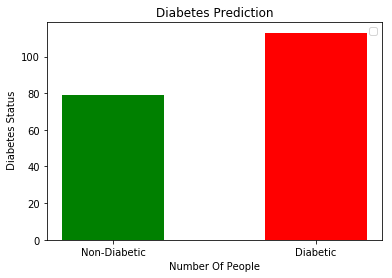

In [27]:
plt.bar("Non-Diabetic",nondaibetic,0.5,color="green")
plt.bar("Diabetic",daibetic,0.5,color='red')

plt.xlabel('Number Of People')
plt.ylabel(' Diabetes Status')
plt.title('Diabetes Prediction')
plt.legend()
plt.show()